## Decision Tree Applications
### Learn from Disaster
##### Objectives
+ Learn how to use the sklearn decision tree classification API
+ Create basic plots and analysis using decision Trees
+ familiarization with supervised learning data science work flow.

#### Delivarables
+ HTML or PDF extraction uploaded to OAKS from a jupyter notebook with the following:
    + data loading
    + data preproccessing transformation
    + data splitting
    + Three Decision Tree Models
        * One Over fitted (good performance on training, poor performance on test)
        * One Under fitted model (poor performance on both training and test)
        * One optimum model
        * plot of the final model
        * Written summary of findings and recomendations from the model detailing which types of passengers are likely to survice a disaster, and lessons learning on model building
        
      + Performance will be dertimed by AUC of the ROC
      + Note in order to determine over vs underfitting, roc_auc_score needs to be determined for both the training and test sets

#### DataSet
+ Download Titanic Data set from https://www.kaggle.com/c/titanic/data
 

In [37]:
import pandas as pd
file_path =  'data/titanic/train.csv'
data = pd.read_csv(file_path)

In [38]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
from __future__ import print_function

import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# setup method for missing data using a median imputer for age and fair
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])
# setup one hot enoding for catagorical features
categorical_features = ['Embarked', 'Sex', 'Pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# combine numeric and catagorical transformation into one column transformer object
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipe = Pipeline(steps=[('preprocessor', preprocessor)])

# drop rows where survived is unknown
data_filtered = data.drop('Survived', axis=1)
y = data['Survived']
x = pipe.fit_transform(data_filtered)

# normalizes the feature names
feature_names = numeric_features +  pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names().tolist()
feature_names = list(map(lambda x: x.replace('x0',categorical_features[0]), feature_names))
feature_names = list(map(lambda x: x.replace('x1',categorical_features[1]), feature_names))
feature_names = list(map(lambda x: x.replace('x2',categorical_features[2]), feature_names))

In [46]:
print(feature_names)

['Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_missing', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3']


In [48]:
## split the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)
print(x_train.shape)
print(x_test.shape)

(596, 11)
(295, 11)


In [49]:
## Build a model
from sklearn import tree
model  = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

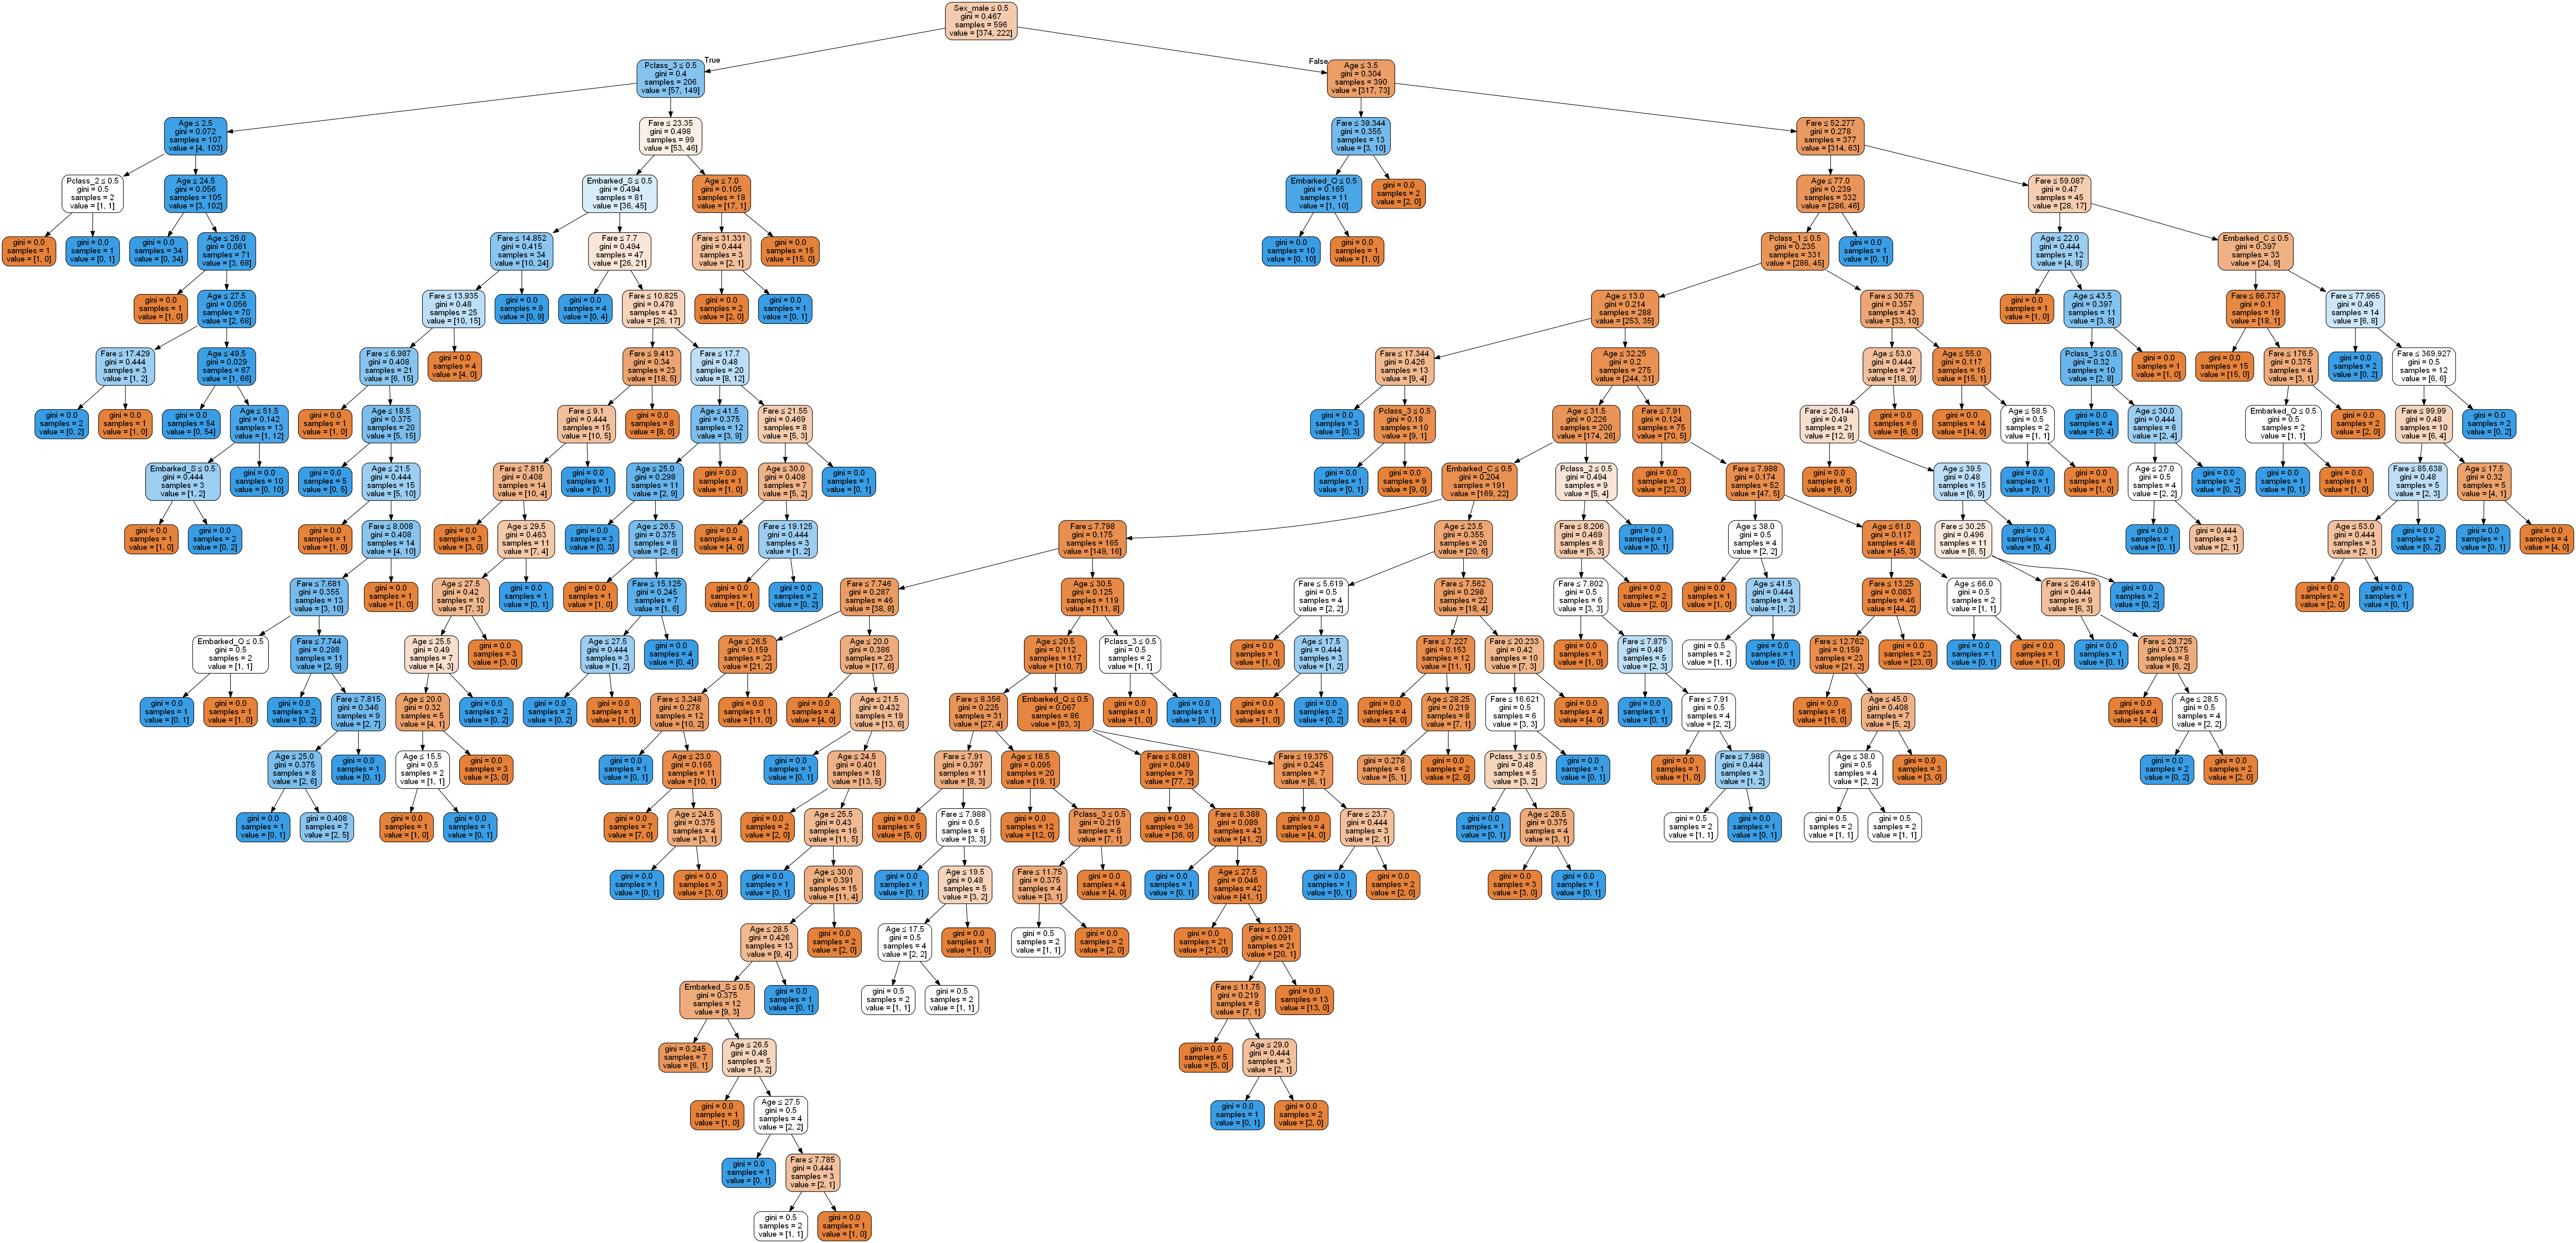

In [50]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = feature_names, 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [51]:
# print out AUC from the test set
from sklearn.metrics import roc_auc_score
preds = model.predict_proba(x_test)[:,1]
test_score = roc_auc_score(y_test, preds)
print(test_score)


0.7473809523809525
